In [1]:
## Ignore this part, it kills any previously running instance of program thus freeing GPU and memory.
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [2]:
# Importing packages
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy

Using TensorFlow backend.


In [3]:
# Importing data
seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [8]:
# Defining ANN architecture and training GA optimised ANN
# Currently following parameters are being optimized but it can further be extended to any parameter of ANN
# Parameters: Number of epochs(Passes), Batch Size, Activation function, weight initialization
def create_model(optimizer='rmsprop', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
	model.add(Dense(8, kernel_initializer=init, activation='relu'))
	model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, verbose=0)
optimizers = ['rmsprop', 'adam']  # Activation function
init1 = ['glorot_uniform'] # Method for neuron's weight initialization
init2=[ 'normal']
init3=['uniform']
epochs = [20, 30]
batches = [20, 50,70]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init1)
param_grid2= dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init2)
param_grid3=dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init3)

cv = EvolutionaryAlgorithmSearchCV(estimator=model,
                                   params=param_grid,
                                   scoring="roc_auc",
                                   cv=StratifiedKFold(n_splits=3),
                                   verbose=1,
                                   population_size=20,
                                   gene_mutation_prob=0.1,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=3, # Due to bug in package total generations will be 4 i.e +1
                                   n_jobs=-1)
%time cv.fit(X, Y)

Types [1, 1, 1, 1] and maxint [1, 1, 2, 0] detected
--- Evolve in 12 possible combinations ---
gen	nevals	avg     	min     	max     
0  	20    	0.539981	0.466691	0.666361
1  	8     	0.581356	0.489633	0.666361
2  	8     	0.619136	0.466691	0.666361
3  	12    	0.614288	0.489633	0.666361
Best individual is: {'optimizer': 'adam', 'epochs': 20, 'batch_size': 50, 'init': 'glorot_uniform'}
with fitness: 0.6663613478280116
CPU times: user 2min 38s, sys: 6.5 s, total: 2min 44s
Wall time: 2min 12s


In [9]:
cv2 = EvolutionaryAlgorithmSearchCV(estimator=model,
                                   params=param_grid2,
                                   scoring="roc_auc",
                                   cv=StratifiedKFold(n_splits=3),
                                   verbose=1,
                                   population_size=20,
                                   gene_mutation_prob=0.1,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=3, # Due to bug in package total generations will be 4 i.e +1
                                   n_jobs=-1)
%time cv2.fit(X, Y)

Types [1, 1, 1, 1] and maxint [1, 1, 2, 0] detected
--- Evolve in 12 possible combinations ---
gen	nevals	avg     	min     	max     
0  	20    	0.661044	0.625041	0.697333
1  	15    	0.678637	0.643622	0.697333
2  	10    	0.689411	0.631452	0.697333
3  	18    	0.693518	0.651493	0.697333
Best individual is: {'optimizer': 'rmsprop', 'epochs': 30, 'batch_size': 20, 'init': 'normal'}
with fitness: 0.6973330720324239
CPU times: user 3min, sys: 6.8 s, total: 3min 6s
Wall time: 2min 35s


In [10]:
cv3 = EvolutionaryAlgorithmSearchCV(estimator=model,
                                   params=param_grid3,
                                   scoring="roc_auc",
                                   cv=StratifiedKFold(n_splits=3),
                                   verbose=1,
                                   population_size=20,
                                   gene_mutation_prob=0.1,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=3, # Due to bug in package total generations will be 4 i.e +1
                                   n_jobs=-1)
%time cv3.fit(X, Y)

Types [1, 1, 1, 1] and maxint [1, 1, 2, 0] detected
--- Evolve in 12 possible combinations ---
gen	nevals	avg     	min     	max     
0  	20    	0.664123	0.617643	0.697619
1  	16    	0.680818	0.642243	0.697619
2  	12    	0.691565	0.673204	0.697619
3  	15    	0.695793	0.673204	0.697619
Best individual is: {'optimizer': 'adam', 'epochs': 30, 'batch_size': 20, 'init': 'uniform'}
with fitness: 0.6976194688986984
CPU times: user 3min 21s, sys: 6.54 s, total: 3min 27s
Wall time: 2min 54s


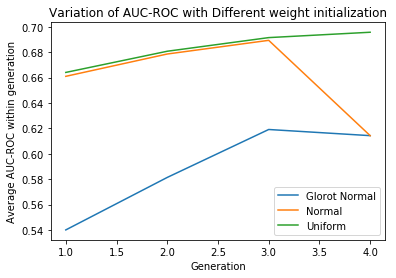

In [12]:
# Plotting average fitness value within each generation against number of generations trained
import matplotlib.pyplot as plt
x = [1,2,3,4]
y1 = [0.539981,0.581356,0.619136,0.614288]
y2 = [0.661044,0.678637,0.689411,0.614288]
y3 = [0.664123,0.680818,0.691565,0.695793]

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plt.legend(['Glorot Normal', 'Normal', 'Uniform'], loc='lower right')
plt.xlabel('Generation')
plt.ylabel('Average AUC-ROC within generation')
plt.title('Variation of AUC-ROC with Different weight initialization')
plt.show()